## Import the neccessary libraries for this project.

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


print("All libraries have been imported!")

All libraries have been imported!


## Print the version of the dependencies.

In [2]:
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
import matplotlib
print(f"matplotlib version: {matplotlib.__version__}")

import scipy
print(f"scipy version: {scipy.__version__}")

import warnings
warnings.filterwarnings("ignore")

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.7.1
scipy version: 1.13.1


### Joining Data For Analysis

In [11]:
# Merging the education_df with the science_dept_table on the "student_id" column to get the science students' survey information and then dropping the
# subject scores and "Total_Grade_Points" columns from the resulting DataFrame.
science_info_df = education_df.merge(science_df, on="student_id", how="inner").drop(["Maths", "English", "Civic_education", "Economics",
                                 "Biology", "Chemistry", "Physics", "Geography","Agric", "Total_Grade_Points"], axis=1)

# Merging the education_df with the arts_dept_table on the "student_id" column to get the arts students' survey information and then dropping the
# subject scores and "Total_Grade_Points" columns from the resulting DataFrame.
arts_info_df = education_df.merge(arts_df, on="student_id", how="inner").drop(["Maths", "English", "Civic_education", "Economics",
                                  "Government", "CRS", "Lit_in_Eng", "Yoruba", "History", "Total_Grade_Points"], axis=1)

# Merging the education_df with the business_dept_table on the "student_id" column to get the business students' survey information and then dropping the
# subject scores and "Total_Grade_Points" columns from the resulting DataFrame.
business_info_df = education_df.merge(business_df, on="student_id", how="inner").drop(["Maths", "English", "Civic_education", "Economics", "Government",
                                  "CRS", "Accounting", "Commerce", "Marketing", "Total_Grade_Points"], axis=1)

In [12]:
# Concatenating the DataFrames for science, arts, and business students along the rows (axis=0) to create a combined DataFrame containing student information from all three departments.
student_data_df = pd.concat([science_info_df, arts_info_df, business_info_df], axis=0)

In [13]:
# Print the few rows.
student_data_df.sample(10, random_state=44)

,student_id,Age,Gender,Department,Home Language,English Fluency,Parents Income,Parents Highest Education Level,Attendance Rate,Disability,Internet Access,Private Lessons,Extracurricular Activity,Resources Access,Disciplinary Actions,Class Participation,Average_Score
38,88,17,Male,Science,Native,Fluent,Low Income,No Formal Education,89,No,Yes,Yes,Yes,Full access,No,Rarely,66.444444
22,69,17,Female,Arts,Native,Very Fluent,High Income,Secondary Education,90,No,Yes,No,Yes,Limited access,Yes,Frequently,60.222222
46,232,17,Female,Business,Native,Fluent,Low Income,No Formal Education,70,No,Yes,Yes,No,Limited access,No,Frequently,62.888889
136,296,16,Female,Science,English,Very Fluent,Middle Income,No Formal Education,73,No,No,No,Yes,Limited access,No,Frequently,59.000000
95,201,17,Female,Science,Native,Very Fluent,Low Income,Tertiary Education,62,No,Yes,Yes,No,Full access,Yes,Frequently,72.666667
20,49,17,Female,Science,Native,Not Fluent,Low Income,Primary Education,94,No,Yes,No,Yes,No access,Yes,Frequently,64.444444
40,199,17,Male,Business,Native,Fluent,High Income,Tertiary Education,73,No,No,Yes,No,Adequate access,Yes,Rarely,63.333333
37,127,16,Male,Arts,English,Not Fluent,High Income,Secondary Education,51,No,No,Yes,No,Adequate access,No,Rarely,52.222222
29,90,18,Male,Arts,English,Not Fluent,Middle Income,No Formal Education,84,No,Yes,No,Yes,No access,No,Rarely,41.555556
43,96,15,Male,Science,Native,Very Fluent,Low Income,Tertiary Education,73,No,No,No,Yes,Adequate access,No,Frequently,74.666667


## **Exploratory Analysis**

In [14]:
# Get the shape (number of rows and columns) of the student data.
shape = student_data_df.shape

# Get the size (total number of elements) of the student data.
size = student_data_df.size

# Print the shape and size.
print(f"The shape of the student data DataFrame is: {shape}")
print(f"The size (total elements) of the student data DataFrame is: {size}")

The shape of the student data DataFrame is: (300, 17)
The size (total elements) of the student data DataFrame is: 5100


In [15]:
# Inspect the student data.
student_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 57
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       300 non-null    int64  
 1   Age                              300 non-null    int64  
 2   Gender                           300 non-null    object 
 3   Department                       300 non-null    object 
 4   Home Language                    300 non-null    object 
 5   English Fluency                  300 non-null    object 
 6   Parents Income                   300 non-null    object 
 7   Parents Highest Education Level  300 non-null    object 
 8   Attendance Rate                  300 non-null    int64  
 9   Disability                       300 non-null    object 
 10  Internet Access                  300 non-null    object 
 11  Private Lessons                  300 non-null    object 
 12  Extracurricular Activity    

In [16]:
# Get the data summary statistics.
student_data_df.describe()

,student_id,Age,Attendance Rate,Average_Score
count,300.000000,300.00000,300.000000,300.000000
mean,150.500000,16.98000,74.553333,58.378889
std,86.746758,1.21842,14.386466,12.363694
min,1.000000,15.00000,50.000000,27.000000
25%,75.750000,16.00000,62.000000,47.777778
50%,150.500000,17.00000,75.000000,58.111111
75%,225.250000,18.00000,87.000000,68.111111
max,300.000000,22.00000,100.000000,88.222222


#### Average Score distribution By Departments

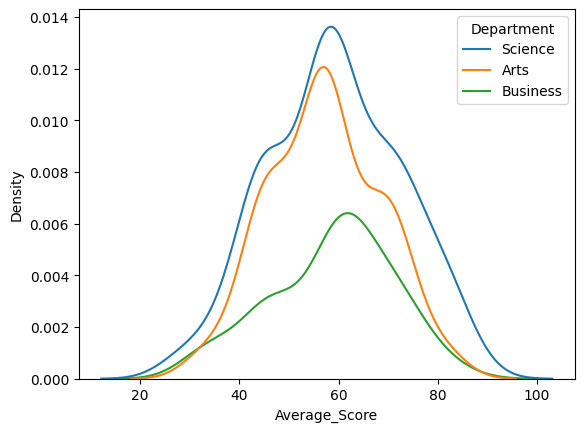

In [58]:
sns.kdeplot(data=student_data_df, x="Average_Score",  hue="Department");

Student Performance By Age

In [18]:
# average score by age
average_scores_by_age = student_data_df.groupby('Age')['Average_Score'].mean().round().reset_index()
average_scores_by_age

,Age,Average_Score
0,15,58.0
1,16,58.0
2,17,60.0
3,18,57.0
4,19,56.0
5,20,60.0
6,22,48.0


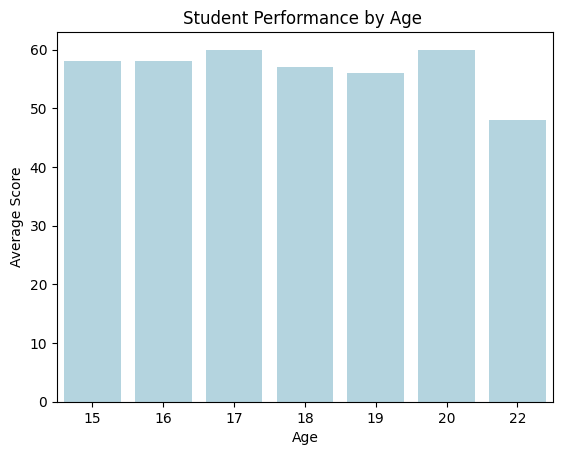

In [19]:
# visualization of country with highest number of deaths
sns.barplot(x= average_scores_by_age['Age'], y= average_scores_by_age['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Age ')
plt.xlabel('Age')
plt.ylabel('Average Score')
plt.xticks();

- Student scores show a slight decline between ages 17 and 19, followed by a recovery at age 20. However, the sharp drop at age 22 is unusual and may require further investigation.

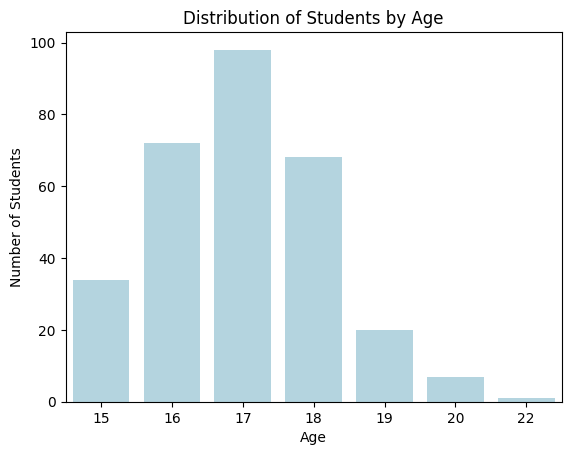

In [20]:
# visualize the age distribution of students to investigate low performance of Age 22
sns.countplot(x='Age', data=student_data_df, color='#ADD8E6')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.title('Distribution of Students by Age')

# Show the plot
plt.show()

- With only one student aged 22, their score is likely an outlier and doesn't reflect broader trends, but rather individual factors like personal or academic challenges.

Student Performance by Gender

In [21]:
# Average Score by Gender
average_scores_by_gender = student_data_df.groupby('Gender')['Average_Score'].mean().round().reset_index()
average_scores_by_gender

,Gender,Average_Score
0,Female,58.0
1,Male,59.0


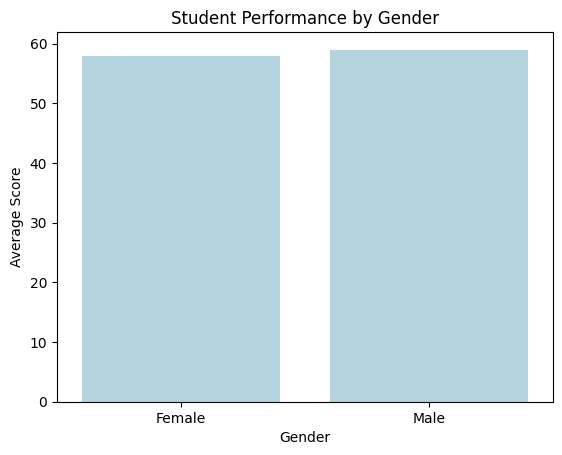

In [22]:
# visualize Student Performance by Gender
sns.barplot(x= average_scores_by_gender['Gender'], y= average_scores_by_gender['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks();

- Average scores for both genders are nearly equal, with males scoring slightly higher, indicating minimal differences in overall performance.

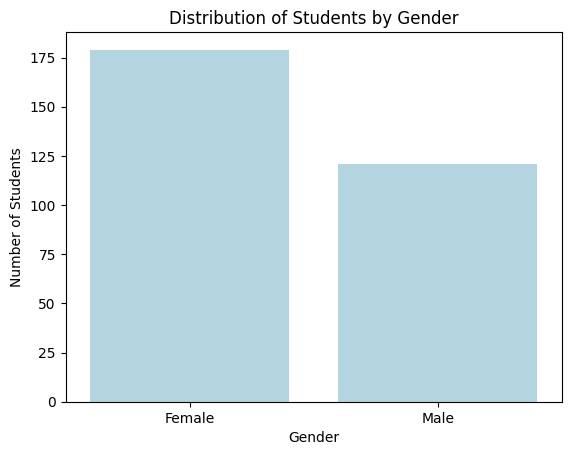

In [23]:
# visualize the Gender distribution of students to investigate
sns.countplot(x='Gender', data=student_data_df, color='#ADD8E6')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Distribution of Students by Gender')

# Show the plot
plt.show()

- There are more female students than males, it likely means that there are more females with lower scores, which brings down their average score a little.

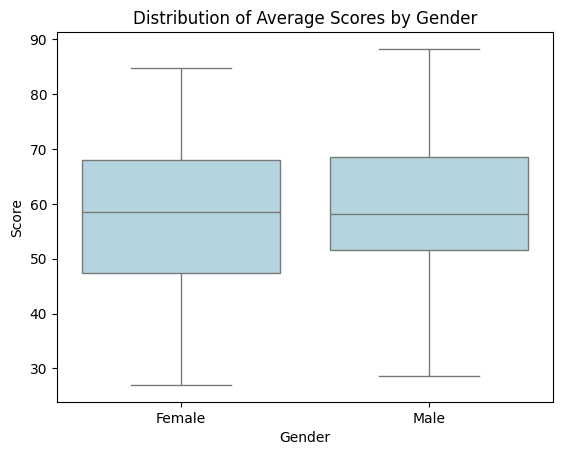

In [24]:
# Visualize boxplot to investigate score distribution by gender
sns.boxplot(x= 'Gender', y= 'Average_Score', data = student_data_df, color='#ADD8E6')

# Add titles and labels
plt.title('Distribution of Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Score')

# Show the plot
plt.show()

- The boxplot shows that male students have higher average scores than female students, in line with their overall slightly higher average.

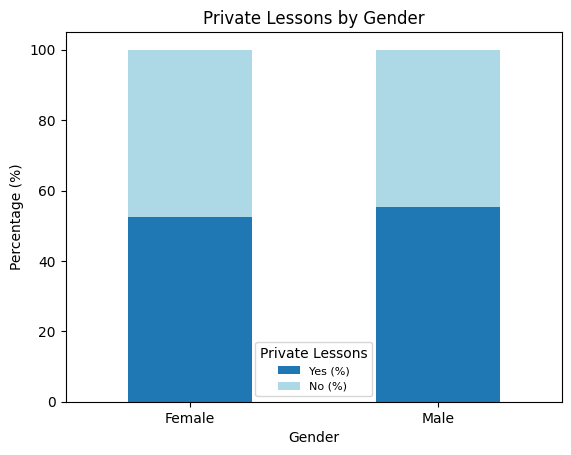

In [25]:
# to check if private lessons is a factor contributing to high male performance

# Calculate the percentage of internet access by gender
private_lessons_counts = student_data_df.groupby(['Gender', 'Private Lessons']).size().unstack(fill_value=0)
private_lessons_percentages = (private_lessons_counts.div(private_lessons_counts.sum(axis=1), axis=0) * 100)

# Combine results into a single DataFrame for easy viewing
results = pd.DataFrame({
    'Yes (%)': private_lessons_percentages['Yes'],
    'No (%)': private_lessons_percentages['No']
}).reset_index()

# Set the index to Gender
results.set_index('Gender')[['Yes (%)', 'No (%)']].plot(kind='bar', stacked=True,
                                                                                        color=['#1f77b4', '#ADD8E6'])

# Add titles and labels
plt.title('Private Lessons by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Private Lessons', loc= 0, prop={'size': 8})
plt.show()

- This shows that a higher proportion of male students have private tutors compared to female students. This explains their better performance relative to female students.

Student Performance By Language Spoken at Home

In [27]:
average_scores_by_language = student_data_df.groupby('Home Language')['Average_Score'].mean().round().reset_index()
average_scores_by_language

,Home Language,Average_Score
0,English,58.0
1,Native,59.0


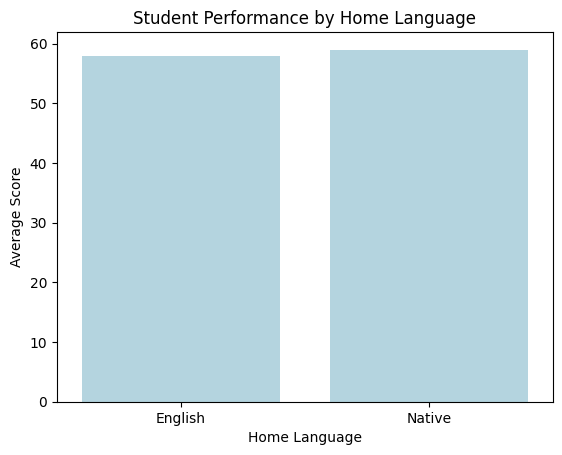

In [28]:
# visualize Student Performance by Home Language
sns.barplot(x= average_scores_by_language['Home Language'], y= average_scores_by_language['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Home Language')
plt.xlabel('Home Language')
plt.ylabel('Average Score')
plt.xticks();

Student Performance By English Fluency

In [29]:
average_scores_by_fluency = student_data_df.groupby('English Fluency')['Average_Score'].mean().round().reset_index()
average_scores_by_fluency

,English Fluency,Average_Score
0,Fluent,59.0
1,Not Fluent,58.0
2,Very Fluent,59.0


Student Performance by Parent's Income level

In [30]:
average_scores_by_income_level = student_data_df.groupby('Parents Income')['Average_Score'].mean().round().reset_index()
average_scores_by_income_level

,Parents Income,Average_Score
0,High Income,59.0
1,Low Income,59.0
2,Middle Income,57.0


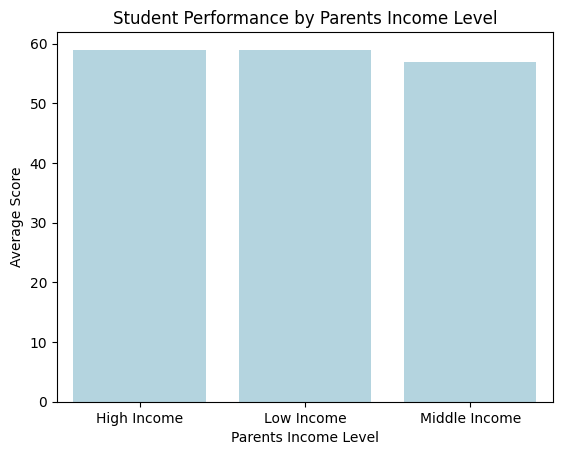

In [62]:
sns.barplot(x= average_scores_by_income_level['Parents Income'], y= average_scores_by_income_level['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Parents Income Level')
plt.xlabel('Parents Income Level')
plt.ylabel('Average Score')
plt.xticks();

- Overall, there is minimal variation in average scores among different income groups, with high and low-income families performing similarly. However, middle-income students show slightly lower performance

 Student Performance by Parents Education

In [31]:
average_scores_by_education_level = student_data_df.groupby('Parents Highest Education Level')['Average_Score'].mean().round().reset_index()
average_scores_by_education_level

,Parents Highest Education Level,Average_Score
0,No Formal Education,60.0
1,Primary Education,60.0
2,Secondary Education,57.0
3,Tertiary Education,57.0


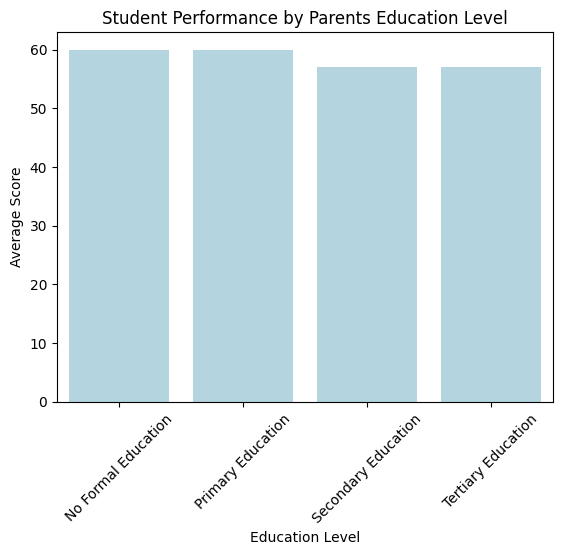

In [32]:
# visualize Student Performance by Home Language
sns.barplot(x= average_scores_by_education_level['Parents Highest Education Level'], y= average_scores_by_education_level['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Parents Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Score')
plt.xticks(rotation = 45);

- Students whose parents have no formal education or primary education achieved the highest average scores of 60.0. In contrast, those with parents who have secondary or tertiary education scored lower, with an average of 57.0. This trend shows that higher levels of parental education do not necessarily lead to improved academic outcomes for their children. Other factors, such as parental involvement, may be influencing these results.

Effect of class attendance on  Student Perfroemance?

In [33]:
# Define the attendance brackets and labels
bins = [50, 75, 90, 100]  # Brackets
labels = ['51-75%', '76-90%', '91-100%']  # Labels for the bins

# Create a new column that categorizes students into the attendance brackets
student_data_df['Attendance Bracket'] = pd.cut(student_data_df['Attendance Rate'], bins=bins, labels=labels, include_lowest=True)

# Group by the attendance bracket and calculate the average test score for each group
grouped = student_data_df.groupby('Attendance Bracket')['Average_Score'].mean().reset_index()
grouped

,Attendance Bracket,Average_Score
0,51-75%,59.134050
1,76-90%,57.256236
2,91-100%,58.229314


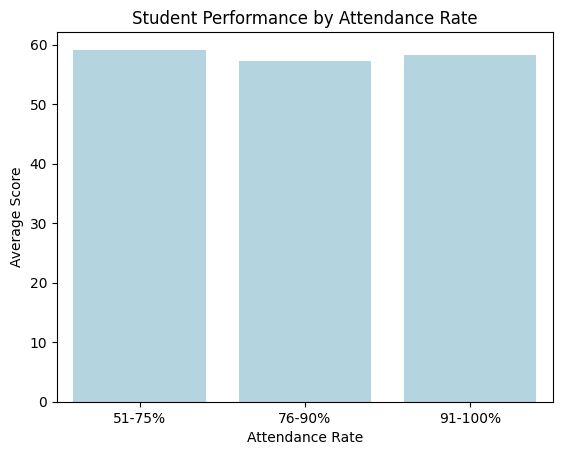

In [34]:
# visualize
sns.barplot(x= grouped['Attendance Bracket'], y= grouped['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Attendance Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Average Score')
plt.show()


 - The average scores vary based on attendance levels, with students attending 51-75% of classes attaining the highest average score of 59.13. Conversely, those attending 76-90% have a lower average score of 57.26, while students with 91-100% attendance achieve a marginally higher average of 58.23. Moderate attendance may correlate with better performance, whereas extremely high attendance does not guarantee significantly improved scores.

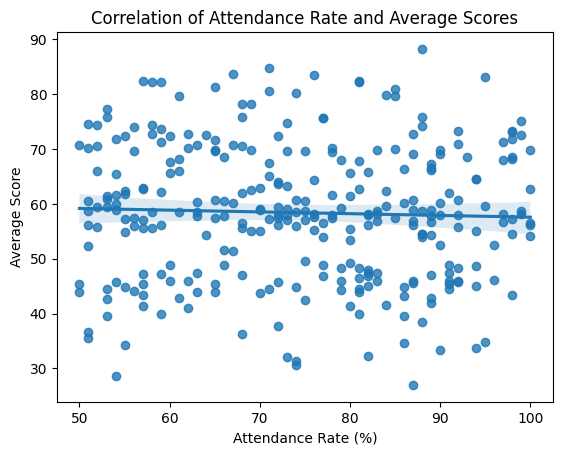

In [35]:
sns.regplot(x='Attendance Rate', y='Average_Score', data=student_data_df)

plt.title('Correlation of Attendance Rate and Average Scores')
plt.xlabel('Attendance Rate (%)')
plt.ylabel('Average Score')
plt.show()

- The scatter plot shows no correlation between attendance rate and average scores. Indicating that higher or lower attendance doesn't significantly impact students average scores.

Student Performance By Disability

In [36]:
average_scores_by_disability = student_data_df.groupby('Disability')['Average_Score'].mean().round().reset_index()
average_scores_by_disability

,Disability,Average_Score
0,No,58.0
1,Yes,61.0


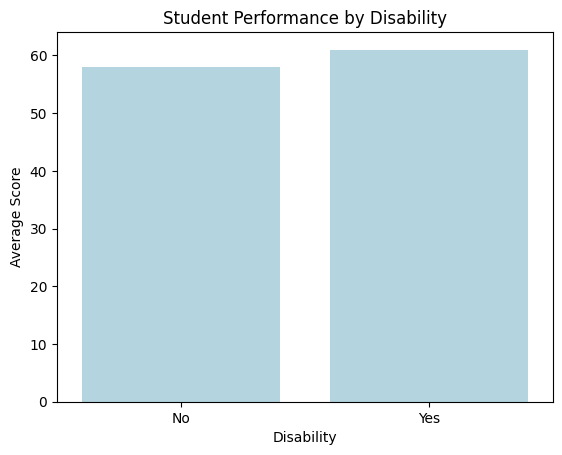

In [37]:
# visualize impact of disability on
sns.barplot(x= average_scores_by_disability['Disability'], y= average_scores_by_disability['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Disability')
plt.xlabel('Disability')
plt.ylabel('Average Score')
plt.show()

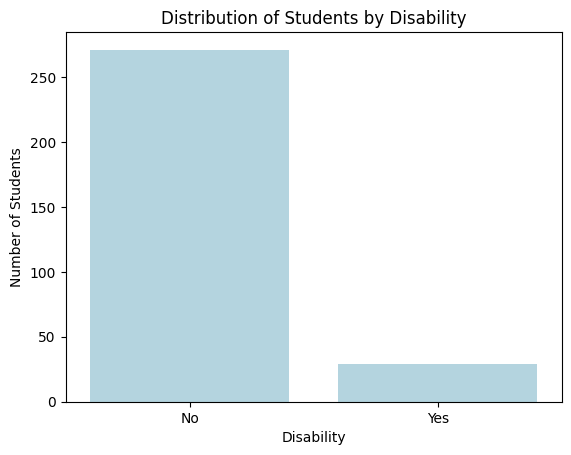

In [38]:
# visualize the Disability distribution among students
sns.countplot(x='Disability', data=student_data_df, color='#ADD8E6')

# Add labels and title
plt.xlabel('Disability')
plt.ylabel('Number of Students')
plt.title('Distribution of Students by Disability')

# Show the plot
plt.show()

How Does Internet Access affect Student Performance?

In [39]:
average_scores_by_internet = student_data_df.groupby('Internet Access')['Average_Score'].mean().round().reset_index()
average_scores_by_internet

,Internet Access,Average_Score
0,No,59.0
1,Yes,57.0


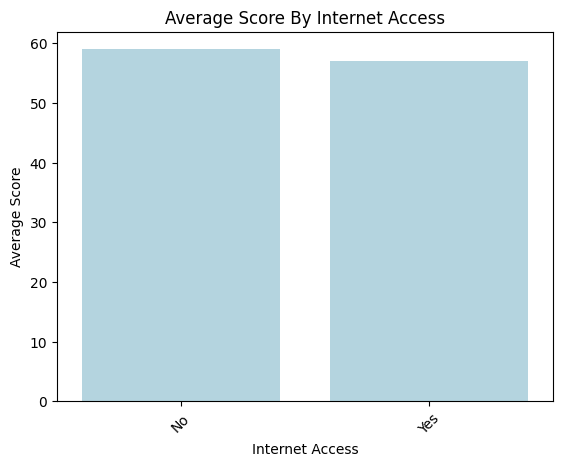

In [40]:
sns.barplot(x= average_scores_by_internet['Internet Access'], y= average_scores_by_internet['Average_Score'], color='#ADD8E6')
plt.title('Average Score By Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

- Students without internet access perform better on average than those with internet access. This shows that internet browsing is one of the factors affecting student performance.

Student Performance by  take Private lessons

In [41]:
average_scores_by_lessons = student_data_df.groupby('Private Lessons')['Average_Score'].mean().round().reset_index()
average_scores_by_lessons

,Private Lessons,Average_Score
0,No,53.0
1,Yes,63.0


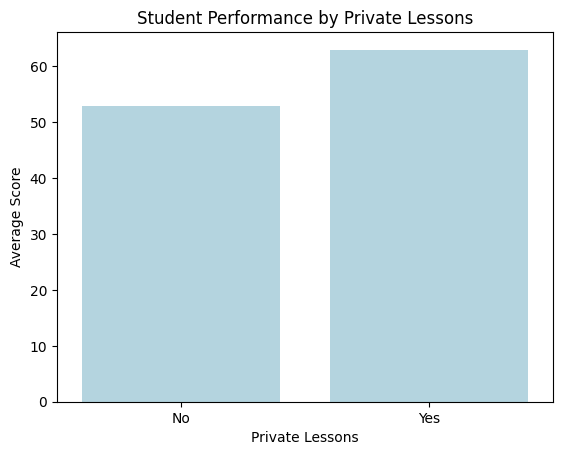

In [42]:
# visualize
sns.barplot(x= average_scores_by_lessons['Private Lessons'], y= average_scores_by_lessons['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Private Lessons')
plt.xlabel('Private Lessons')
plt.ylabel('Average Score')
plt.xticks();

Student Performance By Extracurricular activities

In [43]:
average_scores_by_extracurricular_activity = student_data_df.groupby('Extracurricular Activity')['Average_Score'].mean().round().reset_index()
average_scores_by_extracurricular_activity

,Extracurricular Activity,Average_Score
0,No,52.0
1,Yes,65.0


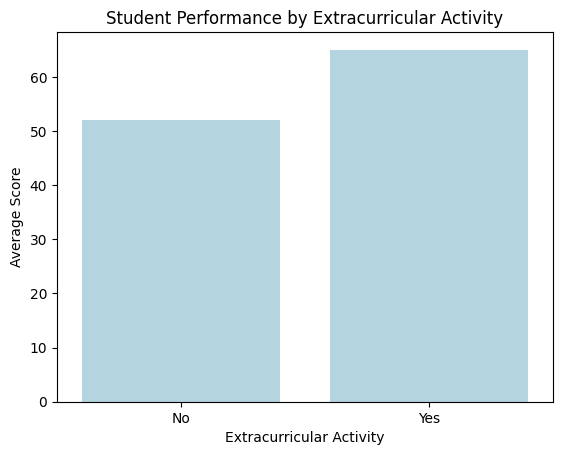

In [44]:
# visualize
sns.barplot(x= average_scores_by_extracurricular_activity['Extracurricular Activity'], y= average_scores_by_extracurricular_activity['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Extracurricular Activity')
plt.xlabel('Extracurricular Activity')
plt.ylabel('Average Score')
plt.xticks();

- Students who participated in extracurricular activities  perform better academically, with a higher average score than those who don't. This suggests that being involved in activities outside class can help improve academic performance.

Average Score By Resources Access

In [45]:
average_scores_by_resources = student_data_df.groupby('Resources Access')['Average_Score'].mean().round().reset_index()
average_scores_by_resources

,Resources Access,Average_Score
0,Adequate access,65.0
1,Full access,61.0
2,Limited access,56.0
3,No access,51.0


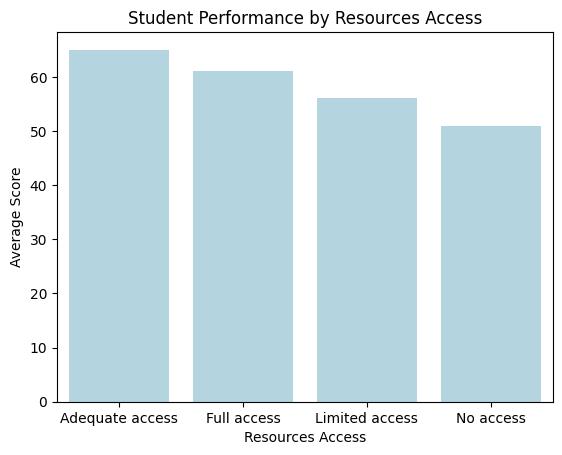

In [46]:
#visualize
sns.barplot(x= average_scores_by_resources['Resources Access'], y= average_scores_by_resources['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Resources Access')
plt.xlabel('Resources Access')
plt.ylabel('Average Score')
plt.xticks();

- Increased access to resources is associated with higher academic performance.

Average Score By Disciplinary Actions

In [47]:
average_scores_by_disciplinary_actions = student_data_df.groupby('Disciplinary Actions')['Average_Score'].mean().round().reset_index()
average_scores_by_disciplinary_actions

,Disciplinary Actions,Average_Score
0,No,58.0
1,Yes,59.0


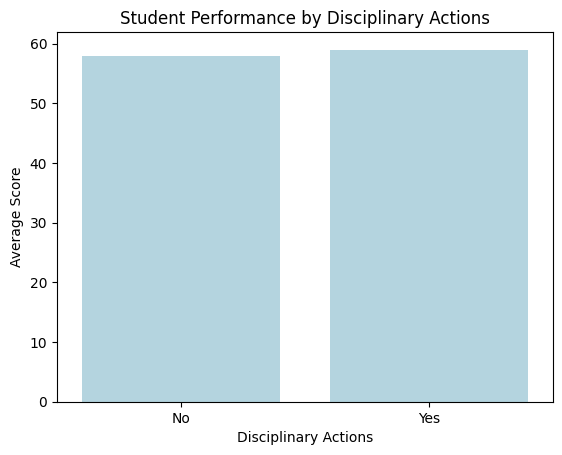

In [61]:
sns.barplot(x= average_scores_by_disciplinary_actions['Disciplinary Actions'], y= average_scores_by_disciplinary_actions['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Disciplinary Actions')
plt.xlabel('Disciplinary Actions')
plt.ylabel('Average Score')
plt.xticks();

- Students who have faced disciplinary sanctions perform better than those who have not.

Average Score By Class Participation

In [48]:
average_scores_by_class_participation = student_data_df.groupby('Class Participation')['Average_Score'].mean().round().reset_index()
average_scores_by_class_participation

,Class Participation,Average_Score
0,Frequently,64.0
1,Rarely,53.0


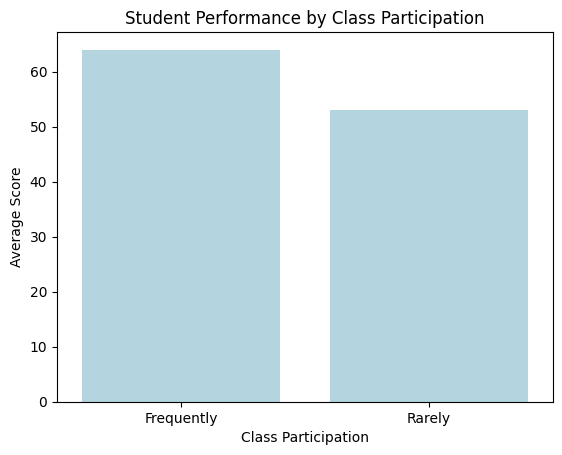

In [60]:
sns.barplot(x= average_scores_by_class_participation['Class Participation'], y= average_scores_by_class_participation['Average_Score'], color='#ADD8E6')
plt.title('Student Performance by Class Participation')
plt.xlabel('Class Participation')
plt.ylabel('Average Score')
plt.xticks();

- students who partake actively in class have high performance than students who rarely participate in class activities.


**Do students from different departments (Science, Arts, Business) have significantly different Average_Score distributions?**

In [52]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform ANOVA test.
f_stat, p_value = stats.f_oneway(
    student_data_df[student_data_df['Department'] == 'Science']['Average_Score'],
    student_data_df[student_data_df['Department'] == 'Arts']['Average_Score'],
    student_data_df[student_data_df['Department'] == 'Business']['Average_Score']
)

print(f"ANOVA test result: F-statistic = {f_stat}, p-value = {p_value}\n")


# Perform Tukey's HSD test.
tukey_result = pairwise_tukeyhsd(endog=student_data_df['Average_Score'],
                                 groups=student_data_df['Department'],
                                 alpha=0.05)

# Print the summary of the test.
print(tukey_result)

ANOVA test result: F-statistic = 0.7227646046902612, p-value = 0.4862602003783726

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
    Arts Business    1.387 0.7738 -3.3984 6.1724  False
    Arts  Science   1.9177 0.4589 -1.8722 5.7075  False
Business  Science   0.5307 0.9594  -4.026 5.0874  False
-------------------------------------------------------


- There is no significant difference between the Arts and Science or Business and Science or Business and Arta departments (with p-value greater than 0.05).

- These results indicate that the academic performance, as measured by average scores, is relatively similar across the Arts, Business, and Science departments.

In conclusion, these results imply that the field of study does not have a significant impact on average student performance in this dataset.

**Does having private lessons significantly affect the students’ Average_Score?**

In [53]:
# Group data by Private Lessons.
group1 = student_data_df[student_data_df['Private Lessons'] == 'Yes']['Average_Score']
group2 = student_data_df[student_data_df['Private Lessons'] == 'No']['Average_Score']

# Perform T-Test Statistics.
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-Test result: t-statistic = {t_stat}, p-value = {p_value}")

T-Test result: t-statistic = 8.053628382910135, p-value = 1.944745167717888e-14


- There is a significant difference between the average scores of students who take private lessons and those who do not

**Is there a correlation between attendance rate and students' Average_Score?**

In [54]:
# Perform Pearson Correlation.
correlation, p_value = stats.pearsonr(student_data_df['Attendance Rate'], student_data_df['Average_Score'])

print(f"Pearson correlation coefficient: {correlation}, p-value: {p_value}")

Pearson correlation coefficient: -0.03730939780137733, p-value: 0.5197413562020415


- The analysis of the relationship between attendance and average score, as indicated by a Pearson correlation coefficient of -0.0373 and a p-value of 0.5197, reveals that there is no significant correlation between these two variables in the dataset. The correlation coefficient, being extremely close to zero, suggests that there is almost no linear relationship between **attendance** and **average score**.

**Does class participation significantly affect students' scores?**

In [55]:
from scipy.stats import ttest_ind

# Separate the data into two groups based on class participation.
active_participants = student_data_df[student_data_df['Class Participation'] == "Frequently"]['Average_Score']
non_active_participants = student_data_df[student_data_df['Class Participation'] == "Rarely"]['Average_Score']

# Perform independent t-test.
t_stat, p_value = ttest_ind(active_participants, non_active_participants)

print(f"T-Test result: t-statistic = {t_stat}, p-value = {p_value}")

T-Test result: t-statistic = 9.133860319396359, p-value = 1.0407444602087386e-17


**Does internet access significantly affect students' Average_Score?**

In [ ]:
# Group data by Internet Access.
group1 = student_data_df[student_data_df['Internet Access'] == 'Yes']['Average_Score']
group2 = student_data_df[student_data_df['Internet Access'] == 'No']['Average_Score']

# Perform T-Test.
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-Test result: t-statistic = {t_stat}, p-value = {p_value}")

T-Test result: t-statistic = -1.3644535827934199, p-value = 0.17345432843133818


- Based on the t-test, internet access does not have a significant impact on students' average scores.